<a href="https://colab.research.google.com/github/marcmacias96/PythonMachineLearning/blob/master/CelciustoFahrenheitLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#ahora importamos la libreria Sklearn para instaciar nuestra regresion lineal model
from sklearn.linear_model import LinearRegression

In [8]:
dataset = pd.read_csv('celsius_a_fahrenheit.csv')

In [9]:
dataset.head()

,Celsius,Fahrenheit
0,-108,NaN
1,-80,NaN
2,-52,NaN
3,-24,NaN
4,-10,14.0


In [30]:
#Dividimos el dataset en las partes que existen y las que no tienen valores para luego usarlas como valores de prueba
test_data = dataset[0:3]
train_data = dataset[4::]
train_data.head()


,Celsius,Fahrenheit
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2


In [31]:
#verificamos que no existan datos incorrectos y si hay los corregimos
index = 4
for test in train_data.Celsius :
  correct = test*1.8 + 32
  if correct != train_data.Fahrenheit.get(index):
    print(f'correcto: {correct}, actual: {train_data.Fahrenheit.get(index)}')
    train_data.Fahrenheit[index] = correct
    print(f'ahora: {train_data.Fahrenheit.get(index)}')
  index+=1

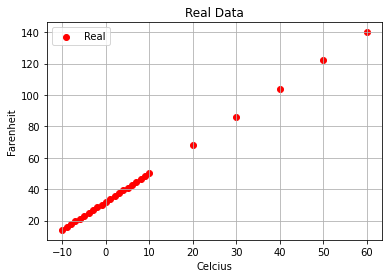

In [32]:
#Graficamos la data real
plt.scatter(train_data.Celsius,train_data.Fahrenheit, c='red', label='Real')
plt.xlabel('Celcius')
plt.ylabel('Farenheit')
plt.legend()
plt.grid(True)
plt.title('Real Data')
plt.show()


In [33]:
#tranformamos los datos a conveniencia del algoritmo de 1D a 2D
celarray = np.array(train_data.Celsius)
fararray = np.array(train_data.Fahrenheit)
celarray= np.reshape(celarray,(-1,1))
fararray = np.reshape(fararray,(-1,1))

In [34]:
#Creamos nuestra instancia de LienarRegresion de Sklear y le damos nuestro dataset como nuestro conjunto de entrenamiento
LR = LinearRegression()
LR.fit(celarray,fararray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
#hacemos un conjunto de datos de prueba (Vamos a meter los datos que no existian en el dataset)

test_celsius_array = np.array(test_data.Celsius)
test_celsius_array = np.reshape(test_celsius_array,(-1,1))
farenheit_predict = LR.predict(test_celsius_array)

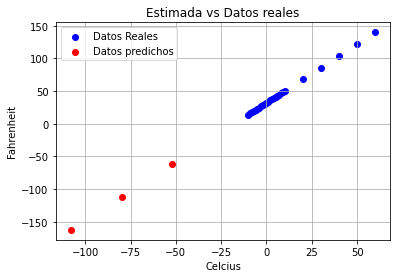

In [40]:
#Graficamos nuestros datos con los datos de prueba 
plt.scatter(dataset.Celsius,dataset.Fahrenheit, c='blue', label='Datos Reales')
plt.scatter(test_celsius_array, farenheit_predict, c='red', label='Datos predichos')
plt.xlabel('Celcius')
plt.ylabel('Fahrenheit')
plt.legend()
plt.grid(True)
plt.title('Estimada vs Datos reales')
plt.show()

In [ ]:
#Como la relación entre Celsius y Fahrenheit es una ecuación lineal de primer orden, nuestro modelo predice la precisión %100. Vamos a comprobarlo:
a=LR.coef_
b=LR.predict([[0]])
print(f'a: {a}, b: {b}')

a: [[1.8]], b: [[32.]]


In [44]:
#Graficamos la ecuacion que permite hacer la trasformacion de valores
x_range = np.arange(-125,100)
f = x_range*1.8 + 32

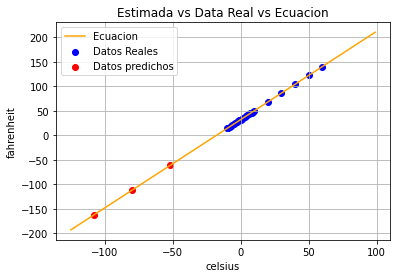

In [50]:
plt.plot(x_range,f,c='orange', label='Ecuacion')
plt.scatter(dataset.Celsius,dataset.Fahrenheit, c='blue', label='Datos Reales')
plt.scatter(test_celsius_array, farenheit_predict, c='red', label='Datos predichos')
plt.xlabel('celsius')
plt.ylabel('fahrenheit')
plt.legend()
plt.grid(True)
plt.title('Estimada vs Data Real vs Ecuacion')
plt.show()

In [46]:

acc_train = LR.score(celarray,fararray)
print('Pesicion de entrenamiento:',acc_train)

Pesicion de entrenamiento: 1.0


In [49]:
acc_test = LR.score(test_celsius_array,farenheit_predict)
print(f'Presicion de prediccion', acc_test)
print(f'Grados centigrados: {test_celsius_array}')
print(f'Grados farengeigth: {farenheit_predict}')

Presicion de prediccion 1.0
Grados centigrados: [[-108]
 [ -80]
 [ -52]]
Grados farengeigth: [[-162.4]
 [-112. ]
 [ -61.6]]
